In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
import matplotlib.colors as mcolors
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
from scipy.optimize import curve_fit
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/Cement_aniso.txt', delimiter='\t')

In [4]:
df

,v_pr_x (m/s),v_pr_y (m/s),v_pr_z (m/s),v_pu_x (m/s),v_pu_y (m/s),v_pu_z (m/s),t_pr_x (s),t_pr_y (s),t_pr_z (s),t_pu_x (s),t_pu_y (s),t_pu_z (s),x (m),y (m),z (m)
0,1817.279047,1918.032787,1792.387543,1826.347305,1866.028708,1726.666667,0.000101,0.000061,0.000029,0.000100,0.000063,0.000030,0.183,0.117,0.0518
1,1718.309859,1799.687011,1644.827586,1822.709163,1766.513057,1590.000000,0.000107,0.000064,0.000029,0.000100,0.000065,0.000030,0.183,0.115,0.0477
2,1779.744346,1909.547739,1813.074566,1779.744346,1868.852459,1775.000000,0.000102,0.000060,0.000020,0.000102,0.000061,0.000020,0.181,0.114,0.0355
3,1843.971631,1878.088962,1842.307692,1860.940695,1979.166667,1900.793651,0.000099,0.000061,0.000026,0.000098,0.000058,0.000025,0.182,0.114,0.0479
4,2080.000000,1986.062718,1968.586387,1700.934579,1844.660194,1889.447236,0.000087,0.000057,0.000019,0.000107,0.000062,0.000020,0.182,0.114,0.0376
5,2171.837709,2186.311787,1995.000000,2192.771084,2145.522388,1781.250000,0.000084,0.000053,0.000020,0.000083,0.000054,0.000022,0.182,0.115,0.0399
6,2051.860203,2129.629630,2090.476190,2068.181818,2024.647887,2110.576923,0.000089,0.000054,0.000021,0.000088,0.000057,0.000021,0.182,0.115,0.0439


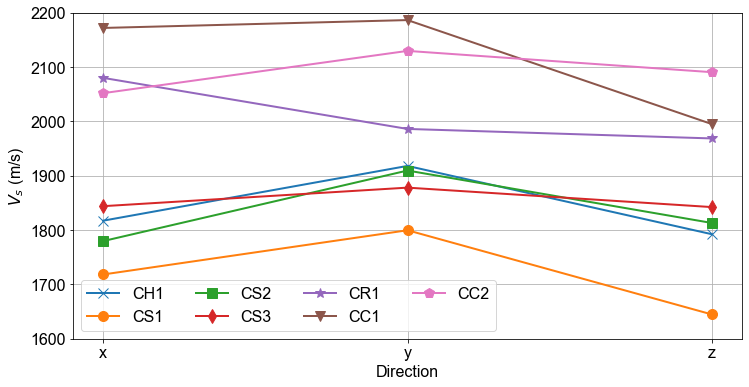

In [5]:
labels=['CH1', 'CS1', 'CS2', 'CS3', 'CR1', 'CC1', 'CC2']
symbols=['-x', '-o', '-s', '-d', '-*', '-v', '-p']
plt.figure(figsize = (12,6))
[plt.plot(['x', 'y', 'z'], [df['v_pr_x (m/s)'][i], df['v_pr_y (m/s)'][i], df['v_pr_z (m/s)'][i]], s, label=l, 
          markersize=10, linewidth=2) for i, s, l in zip(np.arange(0,7,1), symbols, labels)]
plt.ylim(1600, 2200)
plt.ylabel('$V_s$ (m/s)')
plt.xlabel('Direction')
plt.legend(loc= 'lower left', ncol=4)
plt.grid()
plt.show()

In [40]:
abs((df['v_pr_x (m/s)'][0] - df['v_pr_y (m/s)'][0])/df['v_pr_x (m/s)'][0])*100

5.54420853342949

In [41]:
abs((df['v_pr_x (m/s)'][0] - df['v_pr_z (m/s)'][0])/df['v_pr_x (m/s)'][0])*100

1.3697128154914526

In [42]:
abs((df['v_pr_y (m/s)'][0] - df['v_pr_z (m/s)'][0])/df['v_pr_y (m/s)'][0])*100

6.550734943197821

In [50]:
abs((df['v_pr_y (m/s)'][5] - df['v_pr_z (m/s)'][5])/df['v_pr_y (m/s)'][5])*100

8.750434779593498

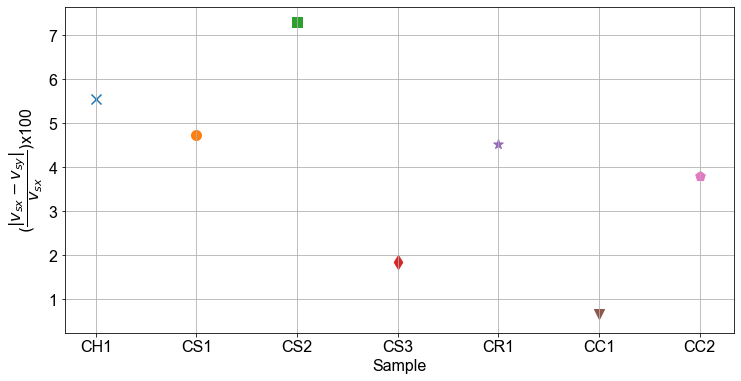

In [39]:
labels=['CH1', 'CS1', 'CS2', 'CS3', 'CR1', 'CC1', 'CC2']
markers=['x', 'o', 's', 'd', '*', 'v', 'p']
plt.figure(figsize = (12,6))
[plt.scatter(i, abs((df['v_pr_x (m/s)'][j] - df['v_pr_y (m/s)'][j]) / df['v_pr_x (m/s)'][j])*100, marker=m, label=l, s=100) 
 for i, j, m, l in zip(labels, np.arange(0,7,1), markers, labels)]
# plt.ylim(1600, 2200)
plt.ylabel('$(\dfrac{|v_{sx} - v_{sy}|}{v_{sx}})$x100')
plt.xlabel('Sample')
# plt.legend(loc= 'lower left', ncol=4)
plt.grid()
plt.show()

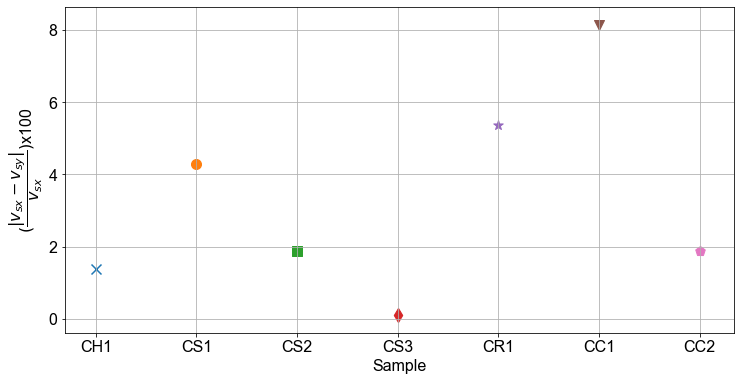

In [40]:
labels=['CH1', 'CS1', 'CS2', 'CS3', 'CR1', 'CC1', 'CC2']
markers=['x', 'o', 's', 'd', '*', 'v', 'p']
plt.figure(figsize = (12,6))
[plt.scatter(i, abs((df['v_pr_x (m/s)'][j] - df['v_pr_z (m/s)'][j]) / df['v_pr_x (m/s)'][j])*100, marker=m, label=l, s=100) 
 for i, j, m, l in zip(labels, np.arange(0,7,1), markers, labels)]
# plt.ylim(1600, 2200)
plt.ylabel('$(\dfrac{|v_{sx} - v_{sz}|}{v_{sx}})$x100')
plt.xlabel('Sample')
# plt.legend(loc= 'lower left', ncol=4)
plt.grid()
plt.show()

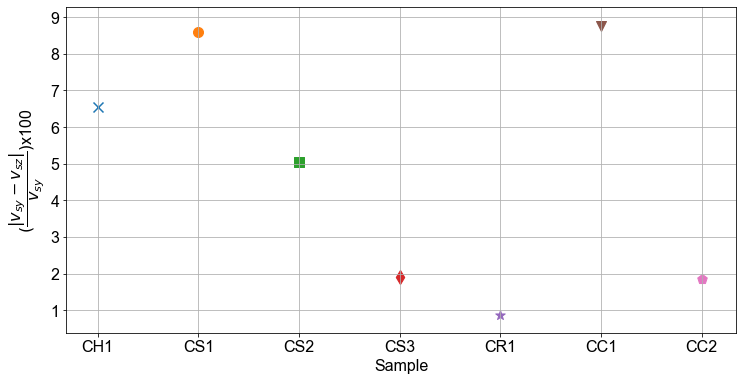

In [41]:
labels=['CH1', 'CS1', 'CS2', 'CS3', 'CR1', 'CC1', 'CC2']
markers=['x', 'o', 's', 'd', '*', 'v', 'p']
plt.figure(figsize = (12,6))
[plt.scatter(i, abs((df['v_pr_y (m/s)'][j] - df['v_pr_z (m/s)'][j]) / df['v_pr_y (m/s)'][j])*100, marker=m, label=l, s=100) 
 for i, j, m, l in zip(labels, np.arange(0,7,1), markers, labels)]
# plt.ylim(1600, 2200)
plt.ylabel('$(\dfrac{|v_{sy} - v_{sz}|}{v_{sy}})$x100')
plt.xlabel('Sample')
# plt.legend(loc= 'lower left', ncol=4)
plt.grid()
plt.show()